<a href="https://colab.research.google.com/github/nourhenesarraj/Day-Night_Classifier/blob/main/MobileNetV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python drive/MyDrive/Day-nightClassification/model_training/mobilenetv2_transfer_learning.py

Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100% 13.6M/13.6M [00:00<00:00, 112MB/s] 
-------------------------Epoch 1-------------------------
Train Loss:0.3200317589250143 Train Accuracy:0.8697282075881958
Valid Loss:0.19667060578689596 Valid Accuracy:0.9337016940116882
Found better model!
----------------------------------------------------------
-------------------------Epoch 2-------------------------
Train Loss:0.2348034382878952 Train Accuracy:0.9062793254852295
Valid Loss:0.20110927462965816 Valid Accuracy:0.9337016940116882
----------------------------------------------------------
-------------------------Epoch 3-------------------------
Train Loss:0.19899569808626802 Train Accuracy:0.9268978834152222
Valid Loss:0.2808603472359355 Valid Accuracy:0.8950276374816895
----------------------------------------------------------
-------------------------Epoch 4-------------------------
Tr

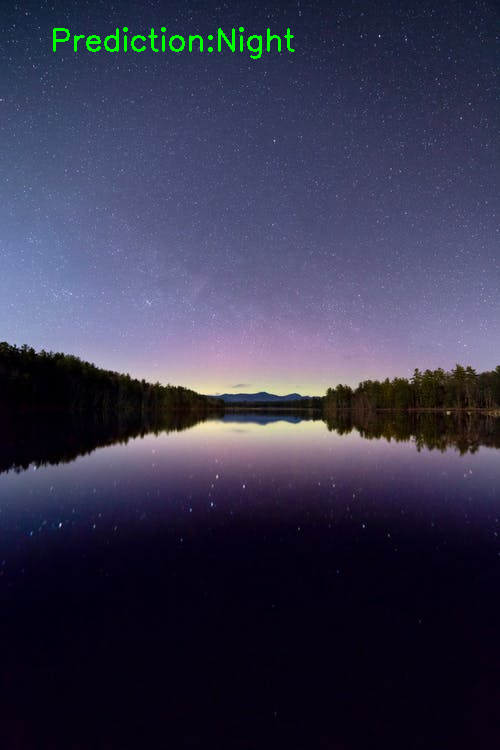

In [ ]:
%run drive/MyDrive/Day-nightClassification/predict_mbv2.py -i /content/drive/MyDrive/Day-nightClassification/day_night_dataset/test/night/nature-landscape-stars-space-1038502.jpeg

In [ ]:
#Architecture du modele (Layers de mobilenet)
from torchvision import models
mbv2 = models.mobilenet_v2(pretrained=True)
print(mbv2)
#or we can use
# import torch
# model = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', pretrained=True)
# model.eval()

MobileNetV2(
  (features): Sequential(
    (0): ConvNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05,

In [ ]:
#afficher le dictionneaire
print("Model's state_dict:")
print(mbv2.state_dict())


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
         ...,

         [[ 3.9487e-04]],

         [[ 9.3940e-02]],

         [[ 2.8383e-02]]],


        [[[ 2.6002e-02]],

         [[ 7.5021e-02]],

         [[ 4.4375e-02]],

         ...,

         [[ 1.4753e-02]],

         [[-1.8650e-03]],

         [[-5.5639e-03]]],


        [[[ 6.2420e-02]],

         [[ 3.9014e-02]],

         [[ 8.3451e-02]],

         ...,

         [[-4.9935e-02]],

         [[-7.9756e-02]],

         [[ 1.3049e-02]]]])), ('features.15.conv.0.1.weight', tensor([0.2105, 0.0957, 0.0808, 0.1523, 0.1280, 0.1227, 0.0837, 0.0721, 0.1284,
        0.1387, 0.0848, 0.1127, 0.1710, 0.1369, 0.1265, 0.1085, 0.1263, 0.1155,
        0.1109, 0.1483, 0.1091, 0.1147, 0.1457, 0.0961, 0.1449, 0.1488, 0.1919,
        0.1054, 0.0976, 0.1205, 0.0910, 0.1271, 0.1173, 0.1081, 0.1528, 0.1236,
        0.1254, 0.1293, 0.1005, 0.1172, 0.1558, 0.1136, 0.1462, 0.1287, 0.0956,
        0.1134, 0.1471, 0.1031, 0

In [ ]:
# mbv2.parameters()
total_params = sum(p.numel() for p in mbv2.parameters())
total_params

3504872

In [ ]:
print("Model's Paramerters:")
for param_tensor in mbv2.state_dict():
    print(param_tensor)
    print("\t", mbv2.state_dict()[param_tensor].size())

Model's Paramerters:
features.0.0.weight
	 torch.Size([32, 3, 3, 3])
features.0.1.weight
	 torch.Size([32])
features.0.1.bias
	 torch.Size([32])
features.0.1.running_mean
	 torch.Size([32])
features.0.1.running_var
	 torch.Size([32])
features.0.1.num_batches_tracked
	 torch.Size([])
features.1.conv.0.0.weight
	 torch.Size([32, 1, 3, 3])
features.1.conv.0.1.weight
	 torch.Size([32])
features.1.conv.0.1.bias
	 torch.Size([32])
features.1.conv.0.1.running_mean
	 torch.Size([32])
features.1.conv.0.1.running_var
	 torch.Size([32])
features.1.conv.0.1.num_batches_tracked
	 torch.Size([])
features.1.conv.1.weight
	 torch.Size([16, 32, 1, 1])
features.1.conv.2.weight
	 torch.Size([16])
features.1.conv.2.bias
	 torch.Size([16])
features.1.conv.2.running_mean
	 torch.Size([16])
features.1.conv.2.running_var
	 torch.Size([16])
features.1.conv.2.num_batches_tracked
	 torch.Size([])
features.2.conv.0.0.weight
	 torch.Size([96, 16, 1, 1])
features.2.conv.0.1.weight
	 torch.Size([96])
features.2.conv

In [ ]:
!nvidia-smi

Thu Feb 10 10:55:04 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    30W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install model-profiler

In [ ]:
!pip install thop

In [ ]:
# from thop import profile
# input = torch.randn(1, 3, 224, 224)
# params = profile(mbv2, inputs=(input ,))
# # profile = model_profiler(mbv2, 10)

# # print(profile)